<a href="https://colab.research.google.com/github/AntonAIG/e_commerce_analytics/blob/main/cosmetics_shop/cosmetics_shop_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cosmetics Shop Data Analysis

Table of contents:
* Introduction
* Business questions
* Data Sources and Structure
* Data Preperation
* Data Processing
* Analyzing Data
* Visualization
* Conclusion and Recommendation

## Introduction

The cosmetics industry is always looking for ways to provide valuable products to their customers. In other to do this, it needs to objectively understand the buying parterns and behaviour of its customers. From the moment a customer arrives at the online store, data is been collected in other to understand customers buying partern. There are 4 distinctive events that customer actions can be classified under.

Events can be:

* view - a user viewed a product
* cart - a user added a product to shopping cart
* remove_from_cart - a user removed a product from shopping cart
* purchase - a user purchased a product

In other to analyze these action and use it to accertain the performance or consumer response to a new product, other factors has to be considered. Factors such as price, brand, and product category can help us understand these outcomes better.

[REES46](https://rees46.com/) for eCommerce wants to analyze consumer behaviour through the use of datasets obtained for a three-month period, October - December 2019. They provide analytics services to online shops and websites that who want to track customer interaction, events and engagement. One of their USPs is to provide a dynamic dashboard that can record and present key metrics to their customers. These metrics will help them to understand customer interaction and engagement.

## Business Question

REES46 wants to know the best perfroming cosmetic product during the Christmas shoping season of 2019. They want to know what mad e it to be very successfull, and how to drive sales for other products.

The retailers can then use this information to improve the way the product is marketed.

## Data Sources and Structure

The dataset for this evaluation comes from an online analytics website for one of its customers. This dataset was made available on [Kaggle](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop), for a five months period: Oct. 2019 - Feb. 2020.

There are nine features recorded from the online store:
* event type: as described in the introduction
* event time: timestamp for the respective event type
* product id: ID of the product
* category id: product's category ID
* categry code: reference code of product's taxonomy
* brand: a string of brand name
* pricce: the selling rpice of the product
* user id: permanent user id
* user_session: tempoary log of user session id.  Changed every time user comes back to the online store from a long pause.

## Data Preperation

In this section, we shall import the data and arrange it to form a single dataset.

In [49]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
palette = "Set1"

Loading the datasets

In [2]:
oct_df = pd.read_csv("/content/drive/MyDrive/Project Portfolio/DA_eCommerce Events History/2019-Oct.csv")
nov_df = pd.read_csv("/content/drive/MyDrive/Project Portfolio/DA_eCommerce Events History/2019-Nov.csv")
dec_df = pd.read_csv("/content/drive/MyDrive/Project Portfolio/DA_eCommerce Events History/2019-Dec.csv")

In [3]:
dec_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


In [4]:
print(oct_df.shape, nov_df.shape, dec_df.shape)

(4102283, 9) (4635837, 9) (3533286, 9)


## Data Processing

The dataset for the months of October, November, and December has the same number of columns representing the same feature.

I will merge the data and create additional columns for: hour, day_of_week, day_of_year, week, and month.

In [5]:
months = pd.merge(oct_df, nov_df, how='outer')
months = pd.merge(months, dec_df, how='outer')

In [6]:
print("Months entries ({}) = Sum of months ({}) ".format(months.shape[0], oct_df.shape[0]+nov_df.shape[0]+dec_df.shape[0]))

Months entries (12271406) = Sum of months (12271406) 


Adding new columns

In [7]:
def datetime_elements(df, column=""):
  #convert event_time column to datetime object
  df[column] = pd.to_datetime(df[column])

  #create additional columns for datetime elements
  df['hour'] = np.int8(df[column].dt.hour)
  df['day'] = np.int16(df[column].dt.day)
  df['day_of_week'] = np.int8(df[column].dt.dayofweek)
  df['day_of_year'] = np.int16(df[column].dt.dayofyear)
  df['week'] = np.int16(df[column].dt.week)
  df['month'] = np.int8(df[column].dt.month)

  return df

In [8]:
months = datetime_elements(months, 'event_time')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


In [9]:
months.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,hour,day,day_of_week,day_of_year,week,month
0,2019-10-01 00:00:00+00:00,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,0,1,1,274,40,10
1,2019-10-01 00:00:03+00:00,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,0,1,1,274,40,10
2,2019-10-01 00:00:07+00:00,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,0,1,1,274,40,10


In [10]:
months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12271406 entries, 0 to 12271405
Data columns (total 15 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
 9   hour           int8               
 10  day            int16              
 11  day_of_week    int8               
 12  day_of_year    int16              
 13  week           int16              
 14  month          int8               
dtypes: datetime64[ns, UTC](1), float64(1), int16(3), int64(3), int8(3), object(4)
memory usage: 1.0+ GB


In [11]:
months.describe()

,product_id,category_id,price,user_id,hour,day,day_of_week,day_of_year,week,month
count,1.227141e+07,1.227141e+07,1.227141e+07,1.227141e+07,1.227141e+07,1.227141e+07,1.227141e+07,1.227141e+07,1.227141e+07,1.227141e+07
mean,5.474675e+06,1.550011e+18,8.475452e+00,5.094500e+08,1.302788e+01,1.556037e+01,2.930153e+00,3.178350e+02,4.559335e+01,1.095363e+01
std,1.318493e+06,1.630757e+17,1.922233e+01,8.434724e+07,5.486388e+00,8.769869e+00,1.975982e+00,2.522650e+01,5.270969e+00,7.874481e-01
min,3.752000e+03,1.487580e+18,-7.937000e+01,1.120748e+06,0.000000e+00,1.000000e+00,0.000000e+00,2.740000e+02,1.000000e+00,1.000000e+01
25%,5.723529e+06,1.487580e+18,2.050000e+00,4.738656e+08,9.000000e+00,8.000000e+00,1.000000e+00,2.960000e+02,4.300000e+01,1.000000e+01
50%,5.809911e+06,1.487580e+18,4.000000e+00,5.448424e+08,1.300000e+01,1.600000e+01,3.000000e+00,3.190000e+02,4.600000e+01,1.100000e+01
75%,5.854897e+06,1.487580e+18,6.900000e+00,5.655666e+08,1.800000e+01,2.300000e+01,5.000000e+00,3.380000e+02,4.900000e+01,1.200000e+01
max,5.917178e+06,2.235524e+18,3.277800e+02,5.954145e+08,2.300000e+01,3.100000e+01,6.000000e+00,3.650000e+02,5.200000e+01,1.200000e+01


In [12]:
print('Price count = {} \n Prices with NaN = {}'.format(months['price'].count(), months['price'].isna().sum()))

Price count = 12271406 
 Prices with NaN = 0


In [13]:
months['product_id'].nunique()

49341

From the description of the numerical values in the dataset, we can see that the minimum price is a negative value. Since these are products on sale, the mininum price should always be above zero for all events categories. 

Therefore, we can replace all negative price values with corresponding price from product id

In [14]:
prod = months[months['price']<0]['product_id']
priz = []
for pr in prod:
  priz.append(months[months['product_id']==pr][['price','event_type']])
priz[0]

,price,event_type
112860,-23.81,purchase
1783312,-23.81,purchase
2143762,-23.81,purchase
3608726,-23.81,purchase
3798007,-23.81,purchase
4510520,-23.81,purchase
4510521,-23.81,purchase
5474456,-23.81,purchase
6412556,-23.81,purchase
7216495,-23.81,purchase


The full view of the table above shows that all events types with negative values are purchases.
Let's find out if there are any purchases with prices greater than zero

In [15]:
months[months['price']>0][months['event_type']=='purchase'].shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(781162, 15)

There are purchases with prices greather than zero. Why does some products have negative price values?

In [16]:
months[months['event_type']=='purchase'].shape

(781217, 15)

This confirms that there are only 55 purchases with negative purchase prices. We can remove them from the list and they will not affect the outcome of the analysis.

In [17]:
bad_rows = list(months[months['price']<0].index)
months.drop(bad_rows, inplace=True, axis=0)

In [18]:
months.describe()

,product_id,category_id,price,user_id,hour,day,day_of_week,day_of_year,week,month
count,1.227135e+07,1.227135e+07,1.227135e+07,1.227135e+07,1.227135e+07,1.227135e+07,1.227135e+07,1.227135e+07,1.227135e+07,1.227135e+07
mean,5.474674e+06,1.550012e+18,8.475619e+00,5.094499e+08,1.302788e+01,1.556036e+01,2.930153e+00,3.178350e+02,4.559335e+01,1.095363e+01
std,1.318496e+06,1.630760e+17,1.922216e+01,8.434734e+07,5.486394e+00,8.769865e+00,1.975982e+00,2.522649e+01,5.270974e+00,7.874479e-01
min,3.752000e+03,1.487580e+18,0.000000e+00,1.120748e+06,0.000000e+00,1.000000e+00,0.000000e+00,2.740000e+02,1.000000e+00,1.000000e+01
25%,5.723529e+06,1.487580e+18,2.050000e+00,4.738654e+08,9.000000e+00,8.000000e+00,1.000000e+00,2.960000e+02,4.300000e+01,1.000000e+01
50%,5.809911e+06,1.487580e+18,4.000000e+00,5.448424e+08,1.300000e+01,1.600000e+01,3.000000e+00,3.190000e+02,4.600000e+01,1.100000e+01
75%,5.854897e+06,1.487580e+18,6.900000e+00,5.655666e+08,1.800000e+01,2.300000e+01,5.000000e+00,3.380000e+02,4.900000e+01,1.200000e+01
max,5.917178e+06,2.235524e+18,3.277800e+02,5.954145e+08,2.300000e+01,3.100000e+01,6.000000e+00,3.650000e+02,5.200000e+01,1.200000e+01


Now, the minimum price is zero. There are also no null values

## Analyzing Data

At this stage, we can begin to look at the relationships within the data, and prepare for visualization.

Let's group the data by product_id and find the total number of products sold for each product.

In [27]:
purchase = months[months['event_type']=='purchase']
# cart = months[months['event_type']=='cart']
view = months[months['event_type']=='view']

In [20]:
event_categories = months.groupby('event_type').count()

In [21]:
num_products = purchase.groupby('product_id').count().sort_values(by='price', ascending=False)
sumPrice_products = purchase.groupby('product_id').sum().sort_values(by='price', ascending=False)

The most sold product by quantiy (5809910) is not the same as the most sold product by price sum (5560754).

Let's form tables with the following definitions:
* quantity_dayofyear: number of sales per day for the top product by quantity
* sales_dayofyear: total sales per day for the top product by sales
* quantity_week: number of sales per week for the top product by quantity
* sales_week: total sales per week for the top product by sales
* numSales_hour: number of sales by time of day
* quantity_brand: number of sales for each brand
* sales_brand: total sales for each brand
* quantity_catID: number of purchases by category
* sales_catID: total sales for each category

In [66]:
topQuantity_product = purchase[purchase['product_id']==5809910]
topSales_product = purchase[purchase['product_id']==5560754]

quantity_dayofyear = topQuantity_product.groupby('day_of_year').count().sort_values(by='day_of_year')
sales_dayofyear = topSales_product.groupby('day_of_year').sum().sort_values(by='price')
quantity_week = topQuantity_product.groupby('week').count().sort_values(by='week')
sales_week = topSales_product.groupby('week').sum().sort_values(by='price')

In [23]:
print('Brand of top product by quantity is {} \nBrand of top product by total sales is {}'.format(
    topQuantity_product['brand'].unique(), topSales_product['brand'].unique()))

Brand of top product by quantity is ['grattol'] 
Brand of top product by total sales is ['strong']


In [24]:
print('Category of top product by quantity is {} \nCategory of top product by sales is {}'.format(
    topQuantity_product['category_id'].unique(), topSales_product['category_id'].unique()
))

Category of top product by quantity is [1602943681873052386] 
Category of top product by sales is [1487580006300255120]


In [25]:
numSales_hour = purchase.groupby('hour').count().sort_values(by='hour', ascending=True)
quantity_brand = purchase.groupby('brand').count().sort_values(by='price', ascending=False)
sales_brand = purchase.groupby('brand').sum().sort_values(by='price', ascending=False)

In [26]:
quantity_catID = purchase.groupby('category_id').count().sort_values(by='price', ascending=False)
sales_catID = purchase.groupby('category_id').sum().sort_values(by='price', ascending=False)

In [29]:
purchase['week'].unique()

array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,  1],
      dtype=int16)

In [41]:
weeks_catID = dict(week=[], cat1=[], cat2=[], cat3=[])

week = purchase['week'].unique()
for w in week:
  x = purchase[purchase['week']==w]
  y=x.groupby('category_id').count().sort_values(by='price', ascending=False)
  weeks_catID['week'].append(w)
  weeks_catID['cat1'].append(y.index[0])
  weeks_catID['cat2'].append(y.index[1])
  weeks_catID['cat3'].append(y.index[2])

In [104]:
cat_df = pd.DataFrame(weeks_catID)
cat_df

,week,cat1,cat2,cat3
0,40,1487580005134238553,1487580007675986893,1487580006317032337
1,41,1487580007675986893,1487580005754995573,1487580006317032337
2,42,1487580007675986893,1487580006317032337,1487580005754995573
3,43,1487580005671109489,1487580007675986893,1487580005427839846
4,44,1487580005671109489,1487580007675986893,1487580005427839846
5,45,1487580007675986893,1487580005595612013,1487580006317032337
6,46,1487580005595612013,1487580007675986893,1487580006317032337
7,47,1487580007675986893,1487580006317032337,1487580005092295511
8,48,1487580007675986893,1487580005671109489,1487580006317032337
9,49,1487580007675986893,1487580005671109489,1487580006317032337


The table above (cat_df) contains the top 3 categories of products that were sold each week by number.

One can ask, is the most viewed product also the most purchased?

In [ ]:
view.groupby('product_id').count().sort_values(by='price', ascending=False)

The most viwed product is 5809910. It is also the most purchased product.

## Visualization

In this section we will create charts that represents each table so that we can share a visual represntation of this evaluation with the stakeholders at REES46

Text(0.5, 1.0, 'Number of events by event type')

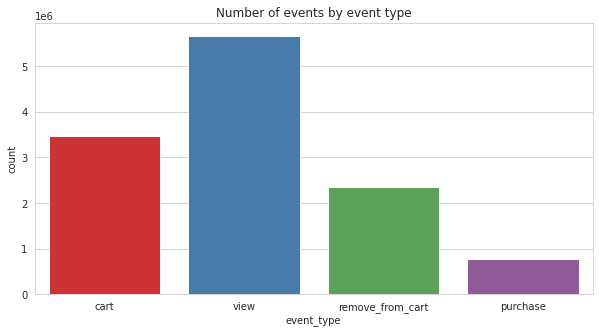

In [82]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='event_type', data=months, palette=palette)
ax.set_title('Number of events by event type')

The number of products completed sales is the lowest among the three event types



**Focusing on the purchases:**

Number of sales per day for the top product by quantity

Text(0, 0.5, 'Number sold')

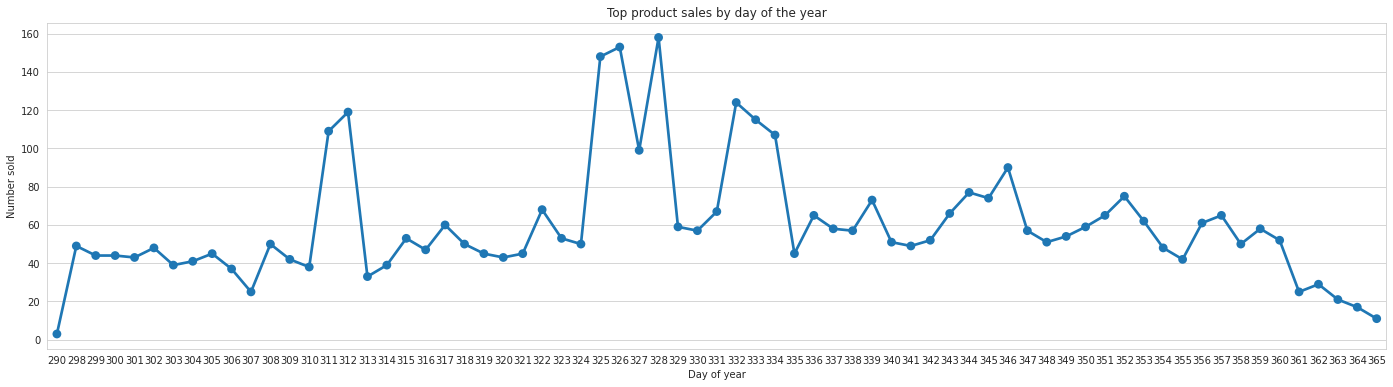

In [94]:
fig, ax = plt.subplots(figsize=(24,6))
sns.pointplot(x=quantity_dayofyear.index, y='price', data=quantity_dayofyear)
ax.set_title('Top product sales by day of the year')
ax.set_xlabel('Day of year')
ax.set_ylabel('Number sold')

In [58]:
datetime.strptime("2019" + "-" + "328", "%Y-%j").strftime("%m-%d-%Y")

'11-24-2019'

This figure shows that the days with the highest number of sales were 22 - 24 November. This was the black friday sales period.

Total sales per day for the top product by sales

Text(0, 0.5, 'Total Price ($)')

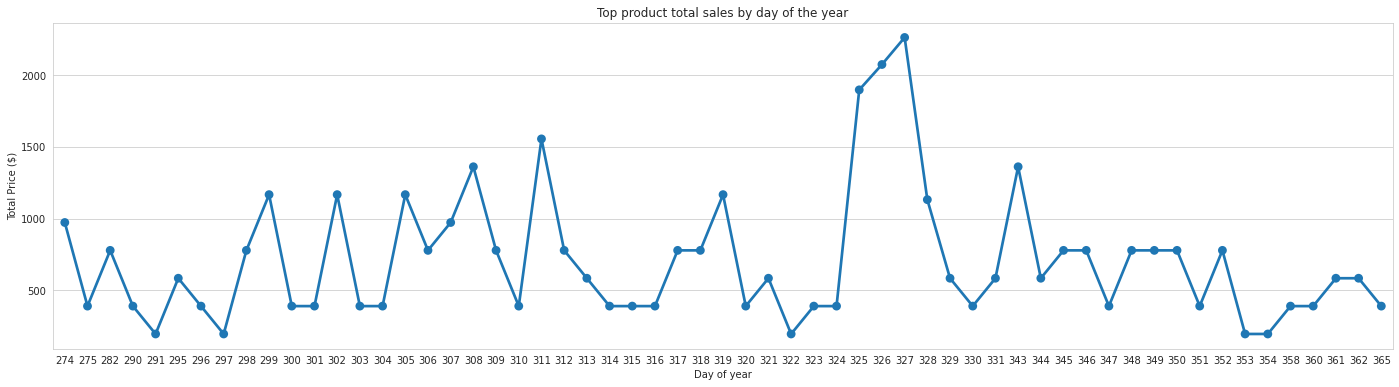

In [95]:
fig, ax = plt.subplots(figsize=(24,6))
sns.pointplot(x=sales_dayofyear.index, y='price', data=sales_dayofyear)
ax.set_title('Top product total sales by day of the year')
ax.set_xlabel('Day of year')
ax.set_ylabel('Total Price ($)')

The total price per day sale for the best product by total sale price was also in the black friday sales period. However, it was not the same product with the highest quantity of sales.

Number of sales per week for the top product by quantity

Text(0.5, 1.0, 'Number of sales per week for the top product by quantity')

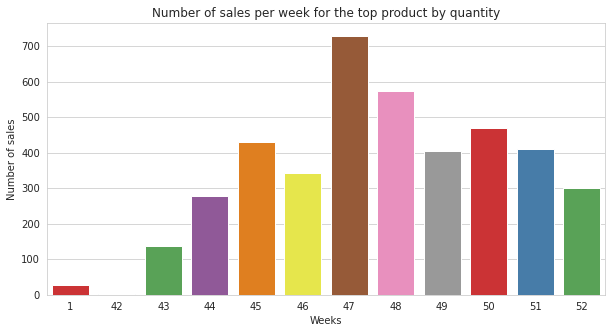

In [69]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=quantity_week.index, y='price', data=quantity_week, palette=palette)
ax.set_ylabel('Number of sales')
ax.set_xlabel('Weeks')
ax.set_title('Number of sales per week for the top product by quantity')

Week 47 is the black friday week for 2019. Most sales and revenue were made in this week. For the top product, that was about 725.

Total sales per week for the top product by sales

Text(0.5, 1.0, 'Total sales per week for the top product by sales')

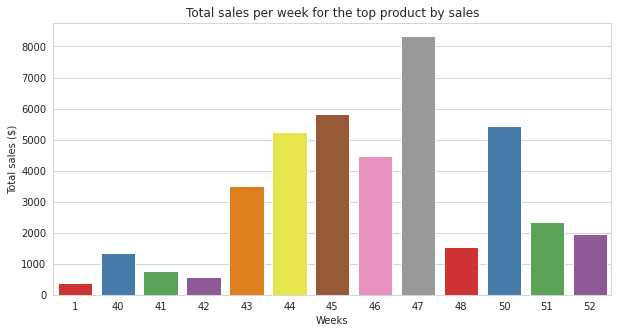

In [70]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=sales_week.index, y='price', data=sales_week, palette=palette)
ax.set_ylabel('Total sales ($)')
ax.set_xlabel('Weeks')
ax.set_title('Total sales per week for the top product by sales')

Week 47 has the highest total price of sales per week for the top product.

Number of sales by time of day

Text(0.5, 1.0, 'Number of sales by time of day')

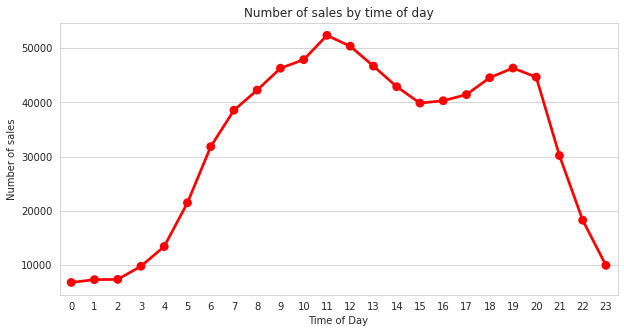

In [96]:
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(x=numSales_hour.index, y='price', data=numSales_hour, color='red')
ax.set_ylabel('Number of sales')
ax.set_xlabel('Time of Day')
ax.set_title('Number of sales by time of day')

Cummulatively, most sales happen during the day. This chart represents all products that were purchased.

**Brands**

Text(0.5, 1.0, 'Number of sales for each brand')

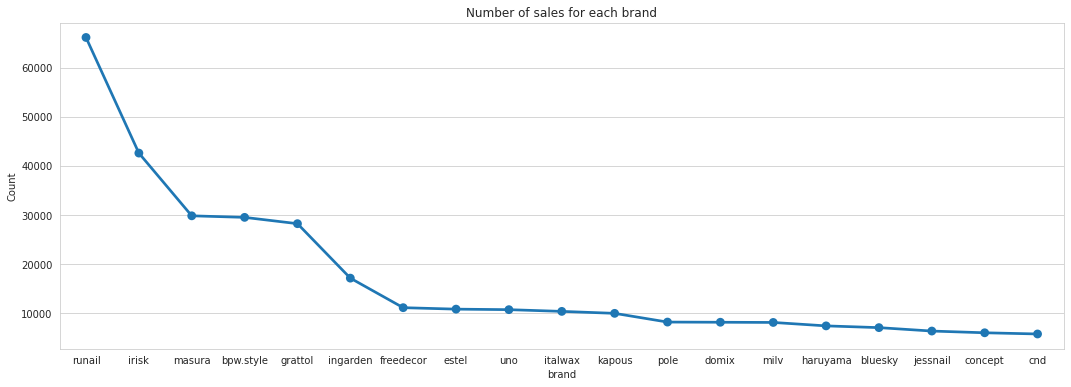

In [97]:
fig, ax = plt.subplots(figsize=(18,6))
sns.pointplot(x=quantity_brand.index[:19], y='price', data=quantity_brand.iloc[:19])
ax.set_ylabel('Count')
ax.set_title('Number of sales for each brand')

The brand with the highest quantity of purchase was *runail*. However the brands of the top product for quantity and sales total are *grattol* and *strong* respectively. *grattol* is the fifth most sold brand.

Total sales for each brand

Text(0.5, 1.0, 'Total sales for each brand')

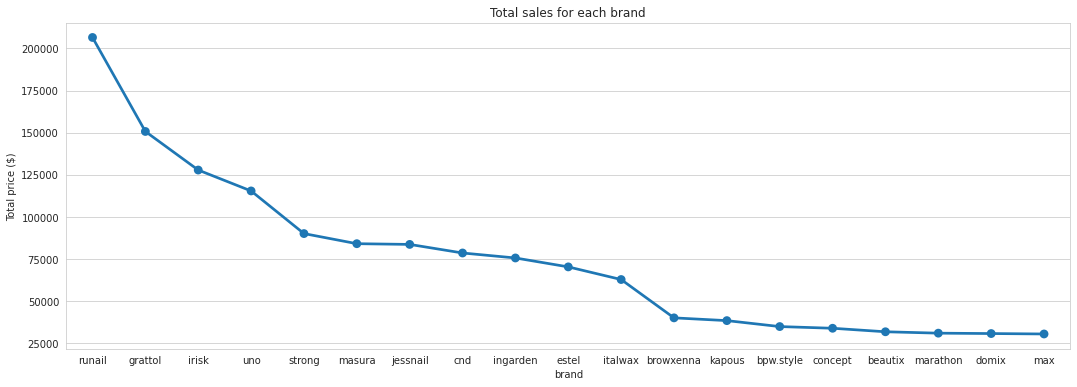

In [98]:
fig, ax = plt.subplots(figsize=(18,6))
sns.pointplot(x=sales_brand.index[:19], y='price', data=sales_brand.iloc[:19])
ax.set_ylabel('Total price ($)')
ax.set_title('Total sales for each brand')

*runail* has the highest total sales (almost $240,000). Hower, the best product with the highest sales belongs to *strong* brand. *strong* is also the 5th brand with the highest total sales price.

Number of purchases by category

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

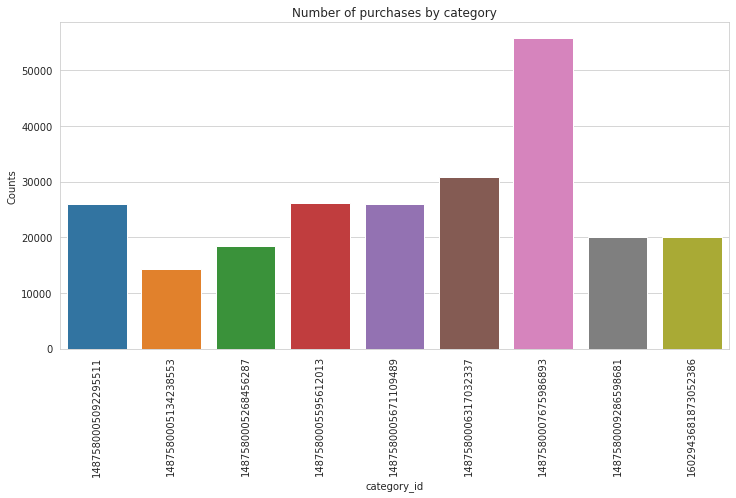

In [108]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=quantity_catID.index[:9], y='price', data=quantity_catID[:9]).set_title(
    'Number of purchases by category')
ax.set_ylabel('Counts')
plt.xticks(rotation=90)

The best performing category is `1487580007675986893`. However, the best product by quantity sold is from `1602943681873052386` category.

Total sales for each category

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

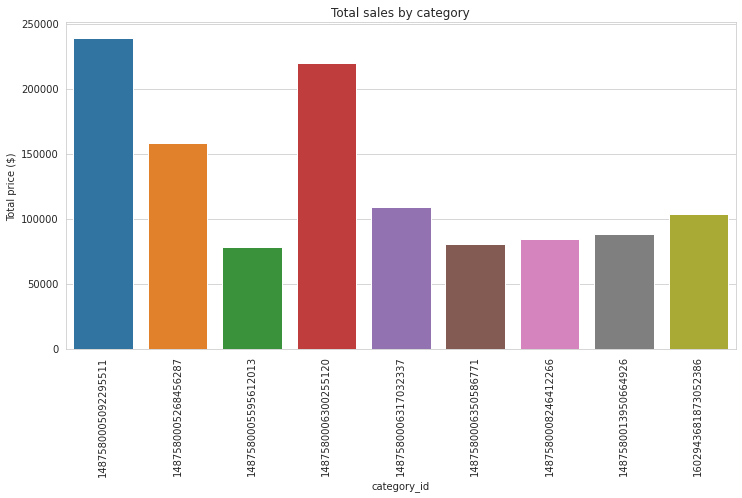

In [113]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=sales_catID.index[:9], y='price', data=sales_catID[:9]).set_title(
    'Total sales by category')
ax.set_ylabel('Total price ($)')
plt.xticks(rotation=90)

The best performing category by total sales is `1487580005092295511` making over $230,000. However the best selling product by total sales is from the `1487580006300255120` category. This is the second highest category from the chart above.

## Conclusion and Recommendation

The percentage of events that are pruchase is little compared to other event types.

The period of highest sales is always influenced by key events in the year such as black friday, Christmas sales or any day when special offers are made. It might be a good idea to provide more special offers as this is seen to drive sales.

The next product categories that will perform well are 1487580006317032337 and
1487580007675986893 . This is because they appear in the top 10 categories by number of purchase, total sales, and top weekly sales for this three month period.

The brands are also an important area to look into. Sales from the top 5 brands are very good and should continue to be made available to customers. *masura* and *ingarden* are next products that are ripe for growth because they are at a balanced price point and have enough room for growth by quantity of sales. Therefore, I recommend that these brands be advertised more.